In [1]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap

data = pd.read_table("201028_GSE122505_Leukemia_clean.txt", sep = "\t")
data

,DDR1,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,UBA7,THRA,PTPN21,...,LOC100129924,FAM86B1,FAM86B2,FAM86DP,FAM86FP,SNHG17,LOC100505915,GSM,disease,FAB
0,7.135135,7.135135,6.482099,6.676021,6.645632,6.382956,9.792603,9.792603,6.519152,5.807912,...,5.566997,7.410738,7.410738,7.410738,7.410738,7.482258,5.944763,1,AML,M2
1,7.379455,7.379455,6.824016,6.575389,6.866953,5.777188,9.868853,9.868853,6.739256,5.394392,...,6.389914,7.684605,7.684605,7.684605,7.684605,7.800407,6.344267,2,AML,M4
2,7.776574,7.776574,6.777692,6.833048,6.740570,5.758784,9.503343,9.503343,6.585977,5.269234,...,6.359589,7.432409,7.432409,7.432409,7.432409,7.514223,6.742695,3,AML,M2
3,7.610568,7.610568,6.876088,6.331511,6.806035,5.697665,10.752530,10.752530,6.454185,5.232170,...,6.214732,7.004306,7.004306,7.004306,7.004306,8.008685,6.567193,4,AML,M2
4,7.734832,7.734832,7.227384,6.647835,6.610387,5.643476,10.536639,10.536639,6.391109,5.396083,...,6.360325,7.707046,7.707046,7.707046,7.707046,7.715277,6.274365,5,AML,M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,7.038301,7.038301,6.850005,7.901066,6.346733,5.267717,7.767640,7.767640,6.419903,5.186932,...,6.376156,6.644048,6.644048,6.644048,6.644048,7.711407,5.770466,2375,AML,M1
2375,7.345443,7.345443,6.636042,6.879693,6.672030,6.021948,8.308662,8.308662,6.669993,5.549938,...,6.243571,7.027639,7.027639,7.027639,7.027639,7.192586,6.124443,2376,AML,unknown
2376,6.712769,6.712769,6.383325,6.440957,6.420609,5.559144,8.105112,8.105112,6.381601,5.335782,...,6.473089,6.537953,6.537953,6.537953,6.537953,7.530842,5.957701,2377,AML,M6
2377,6.773485,6.773485,6.665699,6.688221,6.425495,5.712962,7.996249,7.996249,6.493025,5.208735,...,6.118339,6.716129,6.716129,6.716129,6.716129,7.172273,5.952782,2378,AML,unknown


In [3]:
data["disease"] = data["disease"].replace({"Diabetes_Type_I": "Diabetes", "Diabetes_Type_II": "Diabetes"})
other = ['CML','clinically_isolated_syndrome', 'MDS', 'DS_transient_myeloproliferative_disorder']
data = data[~data["disease"].isin(other)]
target = data["disease"]
df = data.drop("disease", 1)
df = df.drop("GSM", 1)
df = df.drop("FAB", 1)
df.shape
target.value_counts()

/var/folders/_5/577czd8n0h98rgb9kmt_kh2c0000gn/T/ipykernel_18837/935548405.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = data.drop("disease", 1)
/var/folders/_5/577czd8n0h98rgb9kmt_kh2c0000gn/T/ipykernel_18837/935548405.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("GSM", 1)
/var/folders/_5/577czd8n0h98rgb9kmt_kh2c0000gn/T/ipykernel_18837/935548405.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("FAB", 1)


AML          969
ALL          906
Infection    113
Diabetes     103
CLL           85
healthy       82
AMKL          63
Name: disease, dtype: int64

In [5]:
df = df.drop(df.var()[(df.var() < 0.3)].index, axis=1)
from scipy.stats import zscore
df = df.apply(zscore)
df.shape


(2321, 4311)

# PCA 

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit(df).transform(df)

print(pca.explained_variance_ratio_)

[0.16470097 0.10509818]


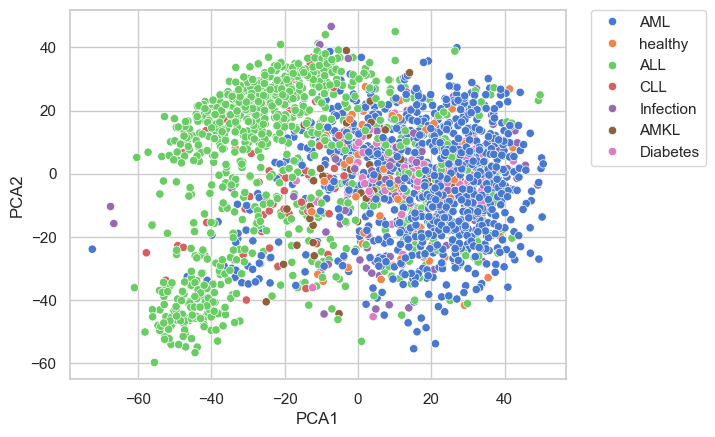

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(target)
y_lan = le.transform(target)

pca_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
pca_df["PCA1"] = X[:, 0]
pca_df["PCA2"] = X[:, 1]
pca_df["Disease"] = target
pca_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
#sns.set_theme(style="whitegrid")

ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Disease",  data=pca_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_PCA.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_PCA.png")
#pca_df.to_csv("GSE122505_Leukemia_PCA.csv")

# t-SNE

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=48.0, learning_rate=200.0, n_iter=2000 )
X = tsne.fit_transform(df, y_lan)

/Users/ananya/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


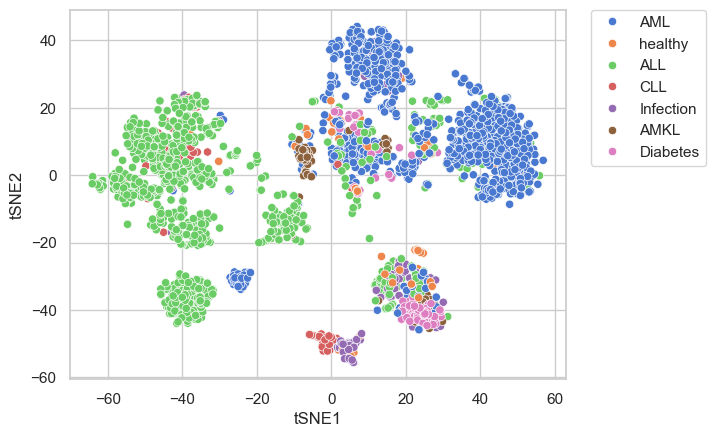

In [15]:
tsne_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
tsne_df["tSNE1"] = X[:, 0]
tsne_df["tSNE2"] = X[:, 1]
tsne_df["Disease"] = target
tsne_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="tSNE1", y="tSNE2", hue="Disease",  data=tsne_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#plt.savefig("GSE122505_Leukemia_tSNE.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_tSNE.png")
#tsne_df.to_csv("GSE122505_Leukemia_tSNE.csv")

In [28]:
pca = PCA(n_components=50)
X_pca = pca.fit(df).transform(df)

tsne = TSNE(n_components=2, perplexity=48.0, learning_rate=200.0, max_iter=2000 )
X = tsne.fit_transform(X_pca, y_lan)

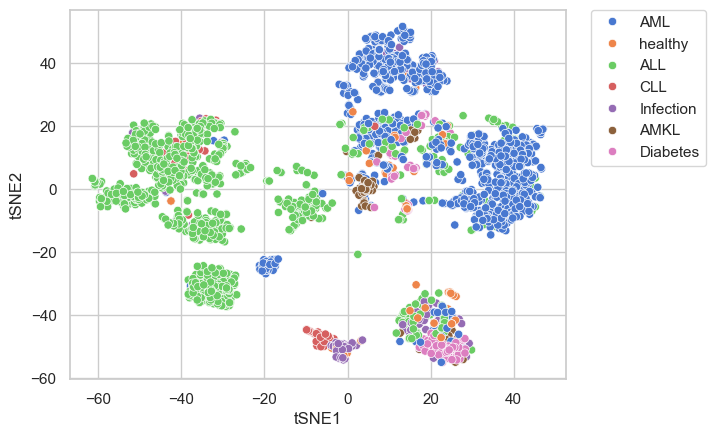

In [29]:
tsne_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
tsne_df["tSNE1"] = X[:, 0]
tsne_df["tSNE2"] = X[:, 1]
tsne_df["Disease"] = target
tsne_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="tSNE1", y="tSNE2", hue="Disease",  data=tsne_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#plt.savefig("GSE122505_Leukemia_PCA_tSNE.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_PCA_tSNE.png")
#tsne_df.to_csv("GSE122505_Leukemia_PCA_tSNE.csv")

# UMAP

In [33]:
import umap
reducer = umap.UMAP(n_neighbors =  100, min_dist= 0.2, metric ="euclidean")
X = reducer.fit_transform(df)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


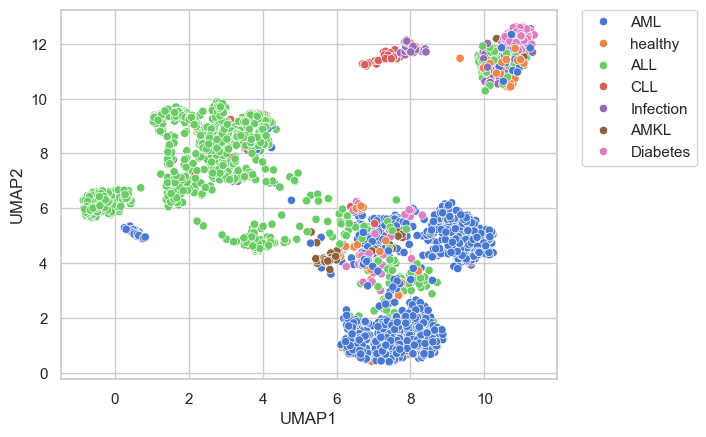

In [35]:
umap_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
umap_df["UMAP1"] = X[:, 0]
umap_df["UMAP2"] = X[:, 1]
umap_df["Disease"] = target
umap_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="UMAP1", y="UMAP2", hue="Disease",  data=umap_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_UMAP.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_UMAP.png")
#ctrl_df.to_csv("GSE122505_Leukemia_UMAP.csv")

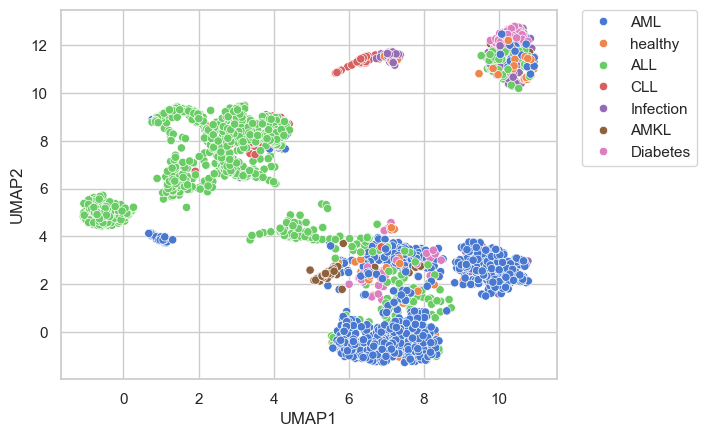

In [37]:
pca = PCA(n_components=50)
X_pca = pca.fit(df).transform(df)

reducer = umap.UMAP(n_neighbors =  100, min_dist= 0.2, metric ="euclidean")
X = reducer.fit_transform(X_pca)

umap_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
umap_df["UMAP1"] = X[:, 0]
umap_df["UMAP2"] = X[:, 1]
umap_df["Disease"] = target
umap_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="UMAP1", y="UMAP2", hue="Disease",  data=umap_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_PCA_UMAP.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_PCA_UMAP.png")
#ctrl_df.to_csv("GSE122505_Leukemia_PCA_UMAP.csv")

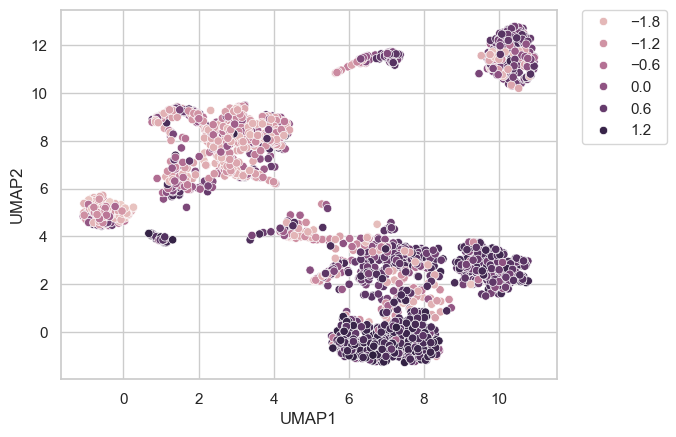

In [63]:
umap_df["ANXA1"] = df["ANXA1"]
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="UMAP1", y="UMAP2", hue="ANXA1",  data=umap_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)